In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

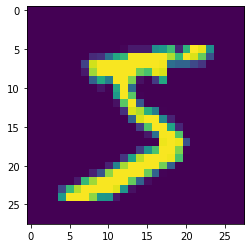

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
# to convert all value in between 0-1 we require to divide it 255
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0] #now we can see all values are in range of 0-1 for 1st photograph

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
#Flattaning layer operation will be require to give 784 pixel values as input
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #It will convert data into 1D --784inputs
model.add(Dense(128,activation="relu"))#no need to give inputs flatten layer will automatically gives  #here 128nodes for input layer
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))  #softmax bz we are having more than one nodes in output

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"]) #in sparse categorical crossentropy we dont need to do one hot encoding

In [47]:
history= model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2841 - accuracy: 0.9178 - val_loss: 0.1483 - val_accuracy: 0.9563
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1185 - accuracy: 0.9647 - val_loss: 0.1212 - val_accuracy: 0.9632
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0817 - accuracy: 0.9747 - val_loss: 0.1017 - val_accuracy: 0.9690
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.0997 - val_accuracy: 0.9721
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.0973 - val_accuracy: 0.9726
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0372 - accuracy: 0.9872 - val_loss: 0.0965 - val_accuracy: 0.9730
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.1008 - val_accuracy:

In [48]:
history.history["accuracy"]

[0.9177500009536743,
 0.9647499918937683,
 0.9746666550636292,
 0.9807916879653931,
 0.9843958616256714,
 0.9872291684150696,
 0.9898750185966492,
 0.9917500019073486,
 0.9929999709129333,
 0.9938541650772095,
 0.9940416812896729,
 0.9951666593551636,
 0.9950833320617676,
 0.9960625171661377,
 0.9951666593551636,
 0.996791660785675,
 0.9961666464805603,
 0.9968541860580444,
 0.996874988079071,
 0.996999979019165,
 0.9960416555404663,
 0.9980000257492065,
 0.9965833425521851,
 0.9981250166893005,
 0.9973124861717224]

In [49]:
y_prob = model.predict(X_test)

In [50]:
y_prob

array([[2.3412961e-14, 4.2498621e-14, 3.5191700e-10, ..., 1.0000000e+00,
        8.9977392e-12, 5.9422445e-12],
       [1.7331992e-22, 6.5192022e-15, 1.0000000e+00, ..., 8.9661284e-24,
        8.9288895e-13, 1.0351416e-30],
       [1.1227369e-12, 9.9999940e-01, 1.2615449e-08, ..., 5.8913764e-07,
        1.9594051e-08, 1.8707520e-11],
       ...,
       [1.4886190e-25, 2.9636224e-19, 1.7664787e-24, ..., 4.6123190e-18,
        2.9926859e-17, 7.2525971e-11],
       [5.5698607e-28, 5.6370549e-24, 3.0905789e-27, ..., 2.7354062e-28,
        1.3338794e-19, 4.4876227e-31],
       [2.1089874e-23, 9.6885764e-28, 1.6751428e-25, ..., 6.5234793e-38,
        6.9981821e-18, 2.7362515e-28]], dtype=float32)

In [51]:
y_pred = y_prob.argmax(axis=1) #Taking only one higher probablity

In [52]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9774

In [54]:
import matplotlib.pyplot as plt

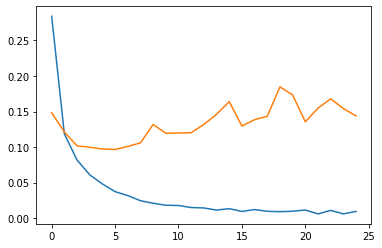

In [55]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

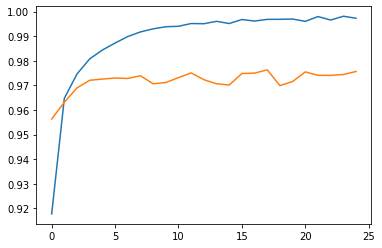

In [56]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

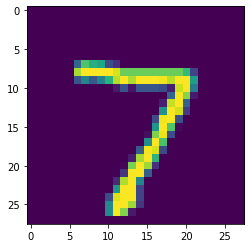

In [57]:
plt.imshow(X_test[0])

In [59]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7])

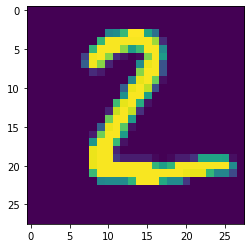

In [60]:
plt.imshow(X_test[1])

In [61]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2])